Importing libraries


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [53]:
#loading the csv data to pandas dataframe.
gold_data=pd.read_csv("C:\\Users\\Subha\\OneDrive\\Desktop\\Datascience\\Projects for resume\\Gold Price Prediction\\archive\\gld_price_data.csv")

In [54]:
#print first 5 rows of the dataframe
gold_data.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [55]:
#print first 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [56]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [57]:
#getting some basic informations about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [58]:
#checking if there is any missing values
gold_data.duplicated().sum()

0

In [59]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [60]:
#getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
    1. Positive correlation
    2. Negative correlation

In [61]:
correlation=gold_data.corr()

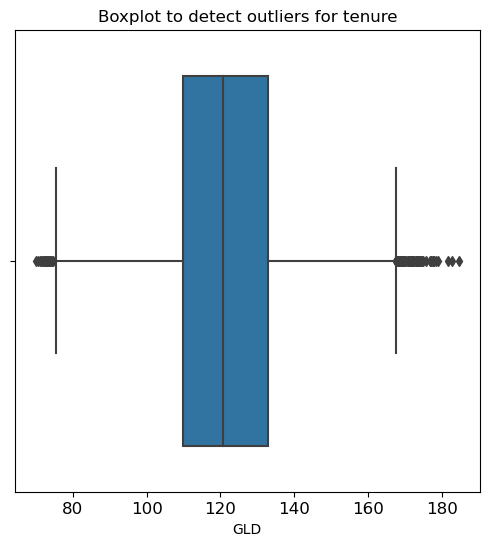

In [62]:
#Check for outliers in the data
plt.figure(figsize=(6,6))
plt.title("Boxplot to detect outliers for tenure", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x= gold_data['GLD'])
plt.show()

In [63]:
percentile25=gold_data['GLD'].quantile(0.25)
percentile75=gold_data['GLD'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit= percentile75+1.5*iqr
lower_limit= percentile25-1.5*iqr
print(upper_limit)
print(lower_limit)

167.51250962500006
75.05249462499995


In [64]:
gold_data[gold_data['GLD']>upper_limit]
gold_data['GLD']<lower_limit

0       False
1       False
2       False
3       False
4       False
        ...  
2285    False
2286    False
2287    False
2288    False
2289    False
Name: GLD, Length: 2290, dtype: bool

In [65]:
outliers=gold_data[gold_data['GLD']>upper_limit] 

<AxesSubplot:>

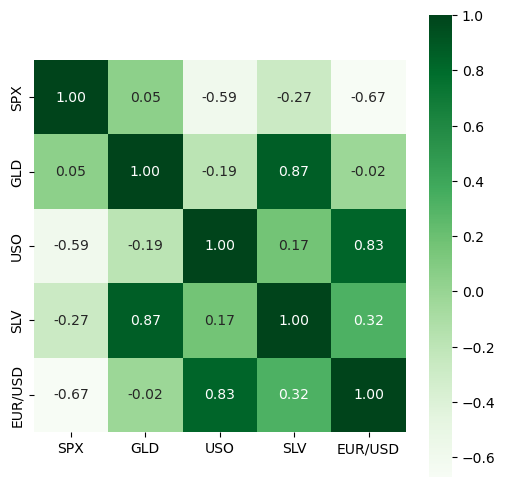

In [66]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(6,6))
sns.heatmap(correlation,square=True, fmt=".2f", annot=True,annot_kws={"size" :10}, cmap="Greens")

In [67]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

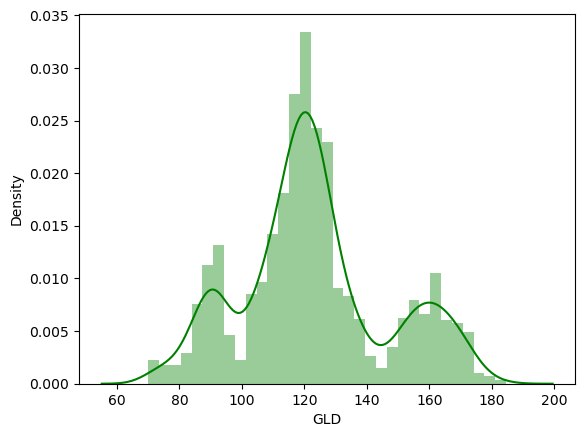

In [68]:
sns.distplot(gold_data['GLD'], color='green')

Splitting the features and target

In [69]:
X=gold_data.drop(['Date', 'GLD'], axis=1)
Y=gold_data['GLD']

Splitting into Training data and Test data

In [70]:
X_train, X_test,Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=2)

Model Training:Random Forest Regressor:
        

In [71]:
regressor=RandomForestRegressor(n_estimators=100)

In [72]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [73]:
test_data_prediction=regressor.predict(X_test)

Model Evaluation

In [74]:
#R squared error
error_score=metrics.r2_score(Y_test, test_data_prediction)
print("R squared error:", error_score)

R squared error: 0.9894320205244383


In [75]:
Y_test=list(Y_test)

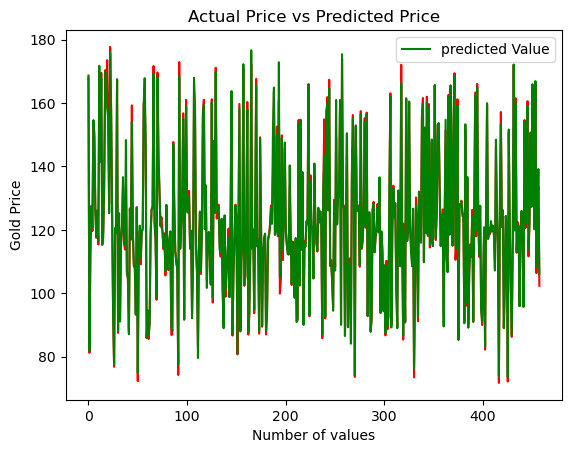

In [76]:
plt.plot(Y_test, color='red', label='')
plt.plot(test_data_prediction, color='green', label='predicted Value')
plt.title("Actual Price vs Predicted Price")
plt.xlabel ("Number of values")
plt.ylabel("Gold Price")  
plt.legend()
plt.show()